In [6]:
import sys
import torch
sys.path.append('..')

device = 'cuda' if torch.cuda.is_available() else 'cpu'

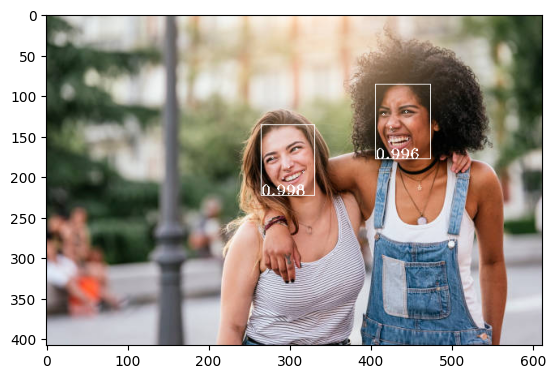

In [7]:
import facer

image = facer.hwc2bchw(facer.read_hwc('data/twogirls.jpg')
                       ).to(device=device)  # image: 1 x 3 x h x w

face_detector = facer.face_detector('retinaface/mobilenet', device=device)
with torch.inference_mode():
    faces = face_detector(image)

facer.show_bchw(facer.draw_bchw(image, faces))


In [8]:
face_parser = facer.face_parser('farl/celebm/448', device=device) # optional "farl/lapa/448"


In [9]:
with torch.inference_mode():
    faces = face_parser(image, faces)

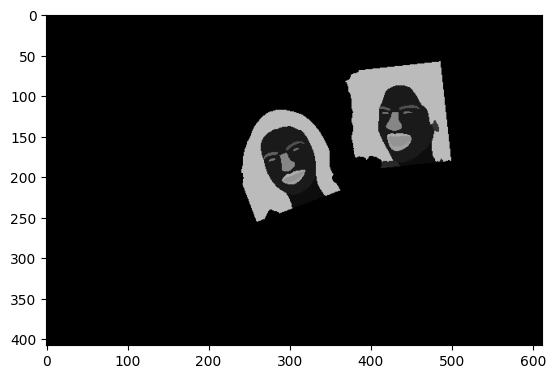

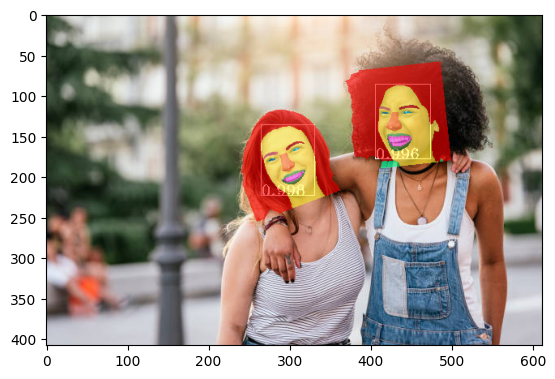

In [10]:
seg_logits = faces['seg']['logits']
seg_probs = seg_logits.softmax(dim=1)  # nfaces x nclasses x h x w
n_classes = seg_probs.size(1)
vis_seg_probs = seg_probs.argmax(dim=1).float()/n_classes*255
vis_img = vis_seg_probs.sum(0, keepdim=True)
facer.show_bhw(vis_img)
facer.show_bchw(facer.draw_bchw(image, faces))